### Importing The necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

### Reading Training And Testing Set Data

In [2]:
X_train_data = pd.read_csv('train_data.csv')
X_test_data = pd.read_csv('test_data.csv')

# FEATURES ENGINEERING

In [3]:
X_train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
X_train_data.shape

(7160, 14)

In [5]:
X_train_data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [6]:
X_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


### Working The Missing Values

In [7]:
X_train_data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

#### Replacing The "." values with 0 and Replacing " >=10 " with 10 respectively

In [8]:
for i in X_train_data['NumberOfWindows']:
    X_train_data['NumberOfWindows'] = X_train_data['NumberOfWindows'].replace('   .', 0)
    X_train_data['NumberOfWindows'] = X_train_data['NumberOfWindows'].replace('>=10', 10)

In [9]:
X_train_data['NumberOfWindows'] = pd.to_numeric(X_train_data['NumberOfWindows'])

In [10]:
X_train_data['NumberOfWindows'].dtype

dtype('int64')

In [11]:
X_train_data['NumberOfWindows'].unique()

array([ 0,  4,  3,  2,  5, 10,  6,  7,  9,  8,  1], dtype=int64)

##### Renaming " train_data[' Building Dimensions '] "  Column

In [12]:
X_train_data = X_train_data.rename(columns={'Building Dimension':'Building_Dimensions'})

#### Replacing The 'NaN' row values in The train_data[' Building_Dimensions ']  column with the mean of the Column

In [13]:
X_train_data['Building_Dimensions'] = X_train_data['Building_Dimensions'].replace(np.NaN, 0).astype(int)

In [14]:
X_train_data['Building_Dimensions'].dtype

dtype('int32')

In [15]:
mean = X_train_data['Building_Dimensions'].mean()
X_train_data['Building_Dimensions'] = X_train_data['Building_Dimensions'].replace(0, mean).astype(int)

In [16]:
X_train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimensions,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290,1,1960.0,0,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595,1,1960.0,0,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840,1,1960.0,0,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680,1,1800.0,3,1053,0


In [17]:
X_train_data['Building_Dimensions'].isnull().sum()

0

In [18]:
X_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          7160 non-null   object 
 1   YearOfObservation    7160 non-null   int64  
 2   Insured_Period       7160 non-null   float64
 3   Residential          7160 non-null   int64  
 4   Building_Painted     7160 non-null   object 
 5   Building_Fenced      7160 non-null   object 
 6   Garden               7153 non-null   object 
 7   Settlement           7160 non-null   object 
 8   Building_Dimensions  7160 non-null   int32  
 9   Building_Type        7160 non-null   int64  
 10  Date_of_Occupancy    6652 non-null   float64
 11  NumberOfWindows      7160 non-null   int64  
 12  Geo_Code             7058 non-null   object 
 13  Claim                7160 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(6)
memory usage: 755.3+ KB


### Working On Columns With Binary Objects

#### Building_Painted Column :  (N-Painted, V-Not Painted)", 

### So N = 1 & V = 0


# 1

In [19]:
X_train_data['Building_Painted'] = X_train_data['Building_Painted'].replace('V', 0)
X_train_data['Building_Painted'] = X_train_data['Building_Painted'].replace('N', 1)

In [20]:
X_train_data['Building_Painted'].head()

0    1
1    0
2    1
3    0
4    0
Name: Building_Painted, dtype: int64

#### Building_Fenced Column :  (N-Fenced, V-Not Fenced)"

### So N = 1 & V = 0

# 2

In [21]:
X_train_data['Building_Fenced'] = X_train_data['Building_Fenced'].replace('V', 0)
X_train_data['Building_Fenced'] = X_train_data['Building_Fenced'].replace('N', 1)

In [22]:
X_train_data['Building_Fenced'].head()

0    0
1    1
2    0
3    0
4    1
Name: Building_Fenced, dtype: int64

### Garden Column :  (V-has garden; O-no garden)

### So V = 1 & O = 0


In [23]:
X_train_data['Garden'] = X_train_data['Garden'].replace(np.nan, 1)
X_train_data['Garden'] = X_train_data['Garden'].replace('V', 1)
X_train_data['Garden'] = X_train_data['Garden'].replace('O', 0)

In [24]:
X_train_data['Garden'].head()

0    1
1    0
2    1
3    1
4    0
Name: Garden, dtype: int64

### Settlement Column : Area where the building is located. (R- rural area; U- urban area)

#### rural = 1, Urban = 2


In [25]:
X_train_data['Settlement'] = X_train_data['Settlement'].replace('R', 1)
X_train_data['Settlement'] = X_train_data['Settlement'].replace('U', 2)

In [26]:
X_train_data['Settlement'].head()

0    2
1    1
2    2
3    2
4    1
Name: Settlement, dtype: int64

In [27]:
X_train_data.dtypes

Customer Id             object
YearOfObservation        int64
Insured_Period         float64
Residential              int64
Building_Painted         int64
Building_Fenced          int64
Garden                   int64
Settlement               int64
Building_Dimensions      int32
Building_Type            int64
Date_of_Occupancy      float64
NumberOfWindows          int64
Geo_Code                object
Claim                    int64
dtype: object

In [28]:
# X_train_data['Insured_Period'].unique()

In [29]:
X_train_data.head(30)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimensions,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,1,0,1,2,290,1,1960.0,0,1053,0
1,H2037,2015,1.000000,0,0,1,0,1,490,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,1,0,1,2,595,1,1960.0,0,1053,0
3,H3834,2013,1.000000,0,0,0,1,2,2840,1,1960.0,0,1053,0
4,H5053,2014,1.000000,0,0,1,0,1,680,1,1800.0,3,1053,0
5,H4977,2012,1.000000,0,0,1,0,1,535,1,1980.0,3,1143,0
6,H7390,2012,1.000000,0,1,0,1,2,2830,1,1988.0,0,1143,0
7,H14488,2015,1.000000,0,1,0,1,2,4952,1,1988.0,0,1160,0
8,H19355,2014,1.000000,0,0,1,0,1,2735,1,2013.0,3,1173,1
9,H18601,2015,1.000000,0,0,1,0,1,520,1,2011.0,2,1224,0


## Selecting Training Features And Target Variables

In [30]:
X_train = X_train_data.drop(['Customer Id', 'Claim', 'Geo_Code', 'Date_of_Occupancy'], axis=1).copy()

In [31]:
y_train =  X_train_data[[ 'Claim']].copy()

In [32]:
y_train.shape

(7160, 1)

In [33]:
X_train_data['Customer Id'].unique()

array(['H14663', 'H2037', 'H3802', ..., 'H6204', 'H6537', 'H7470'],
      dtype=object)

In [34]:
X_train.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimensions,Building_Type,NumberOfWindows
0,2013,1.0,0,1,0,1,2,290,1,0
1,2015,1.0,0,0,1,0,1,490,1,4
2,2014,1.0,0,1,0,1,2,595,1,0
3,2013,1.0,0,0,0,1,2,2840,1,0
4,2014,1.0,0,0,1,0,1,680,1,3


In [35]:
X_train.dtypes

YearOfObservation        int64
Insured_Period         float64
Residential              int64
Building_Painted         int64
Building_Fenced          int64
Garden                   int64
Settlement               int64
Building_Dimensions      int32
Building_Type            int64
NumberOfWindows          int64
dtype: object

In [51]:
# X_train.shape

(7160, 10)

## DATA VIZ

In [45]:
column = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Dimensions','Building_Type', 'Date_of_Occupancy', 'NumberOfWindows', 'Geo_Code','Claim']

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


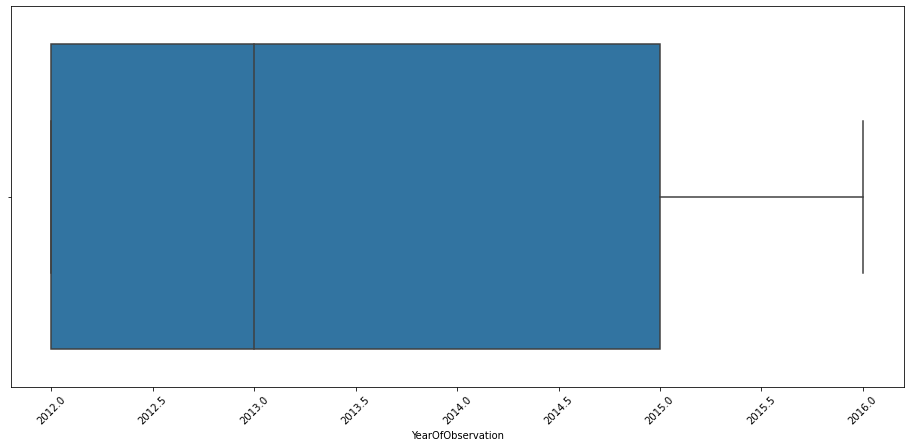

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


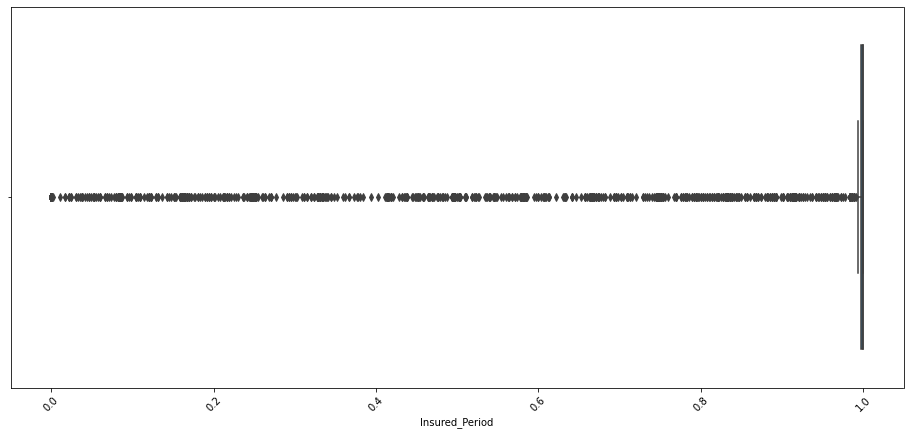

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


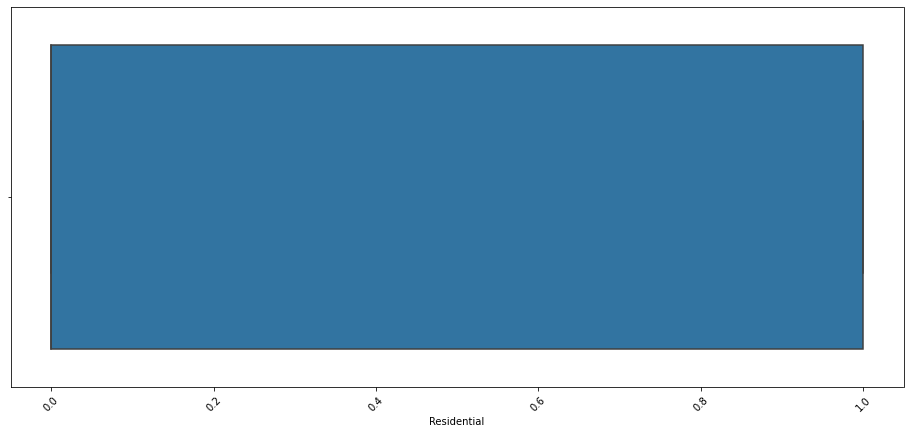

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


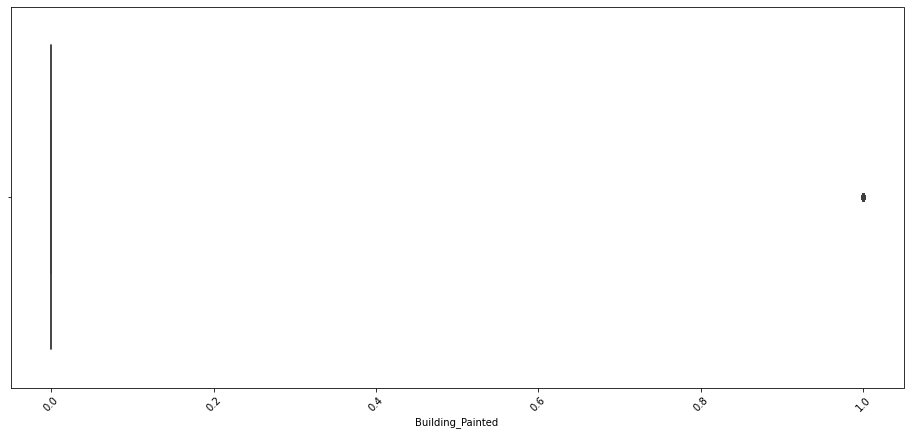

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


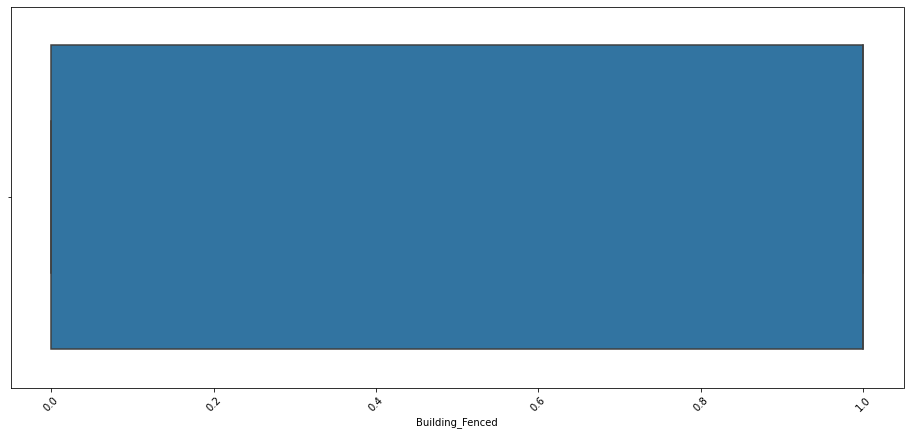

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


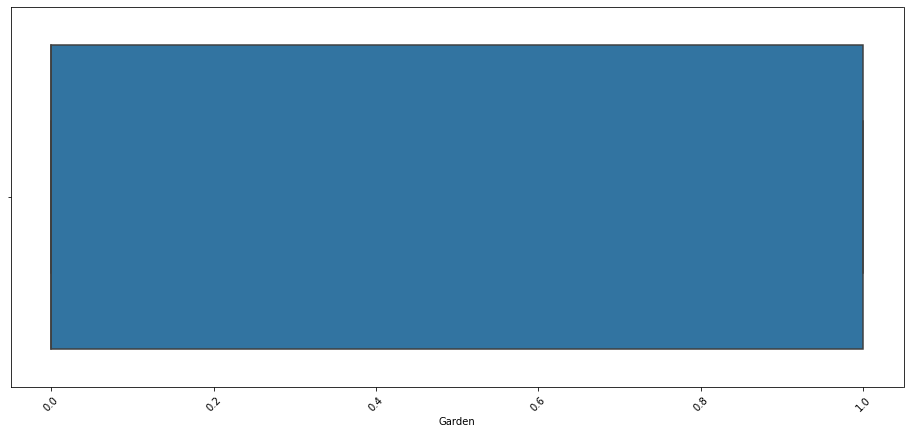

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


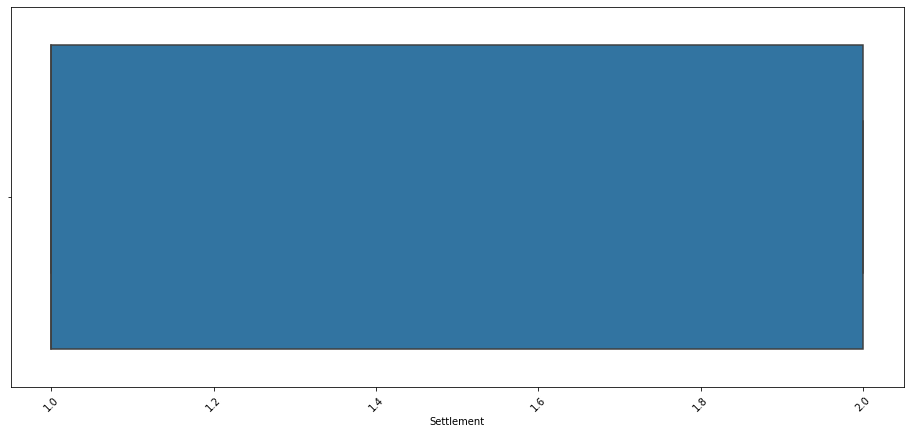

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


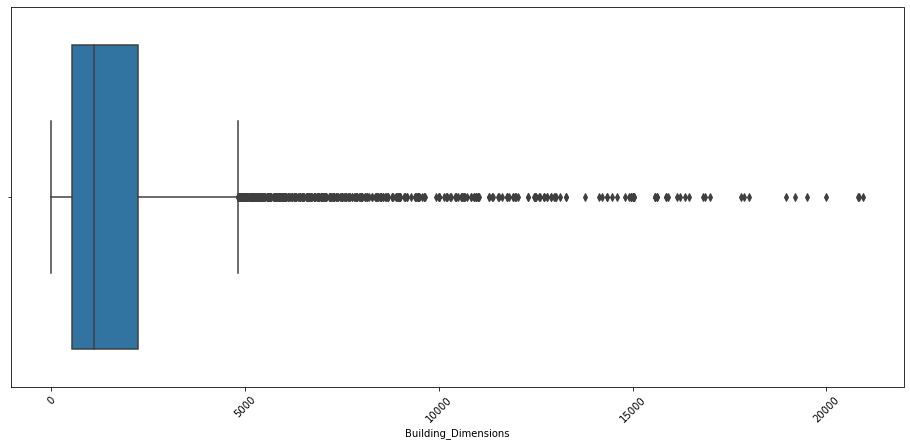

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


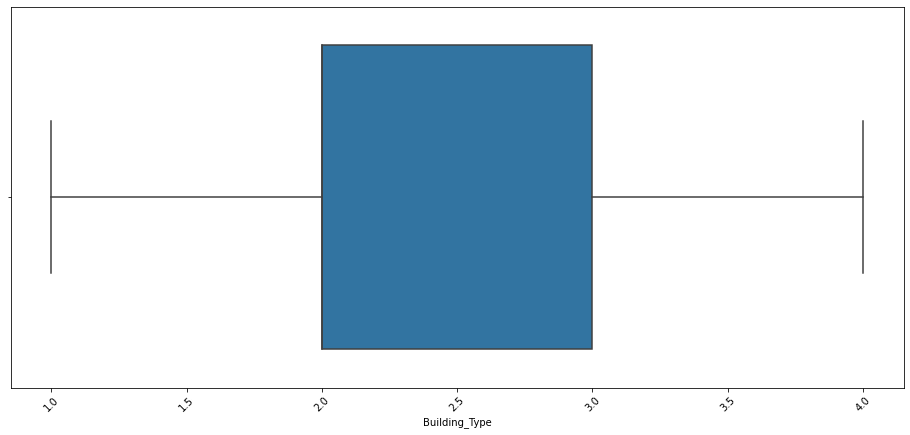

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


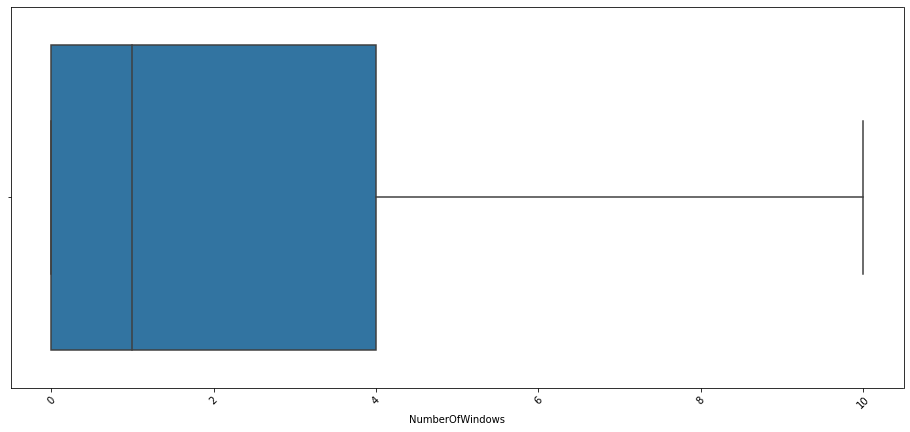

In [50]:
for data in X_train.columns:
    plt.figure(figsize=(16,7))
    sns.boxplot(X_train[data])
    plt.xticks(rotation=(45))
    plt.show()

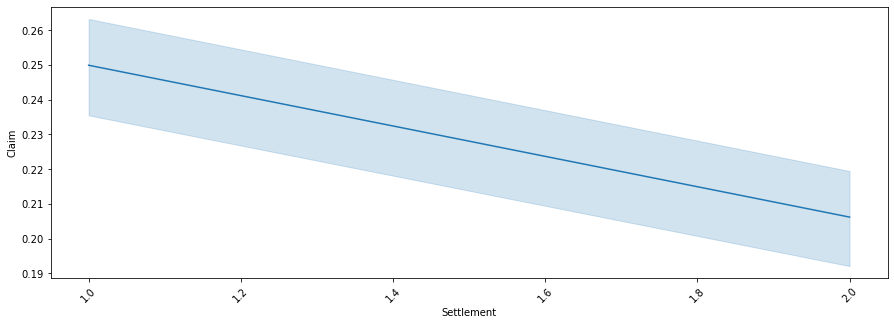

In [55]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.lineplot(x = X_train['Settlement'], y=y_train['Claim'], data=X_train_data)
plt.show()

## WORKING ON THE TESTING DATA

In [56]:
X_test_data.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
3064,H11583,2015,1.0,0,V,V,V,U,NaN,4,1900.0,.,NaN
3065,H11720,2012,1.0,0,V,V,V,U,NaN,2,1948.0,.,NaN
3066,H11721,2012,1.0,0,V,V,V,U,NaN,2,1993.0,.,NaN
3067,H12408,2013,1.0,0,V,V,V,U,NaN,1,1800.0,.,NaN
3068,H9021,2012,1.0,0,V,V,V,U,NaN,2,1950.0,.,NaN


In [57]:
X_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [58]:
X_test_data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [59]:
X_test_data.shape

(3069, 13)

#### Renaming " test_data[' Building Dimensions '] " Column

In [60]:
X_test_data = X_train_data.rename(columns={'Building Dimension':'Building_Dimensions'})

#### Replacing The '.' row values in The test_data[' Building_Dimensions '] column with the mean of the Column

In [61]:
X_test_data['Building_Dimensions'] = X_test_data['Building_Dimensions'].replace(np.NaN, 0).astype(int)

In [62]:
mean = X_test_data['Building_Dimensions'].mean()
X_test_data['Building_Dimensions'] = X_test_data['Building_Dimensions'].replace(0, mean)

In [63]:
X_test_data.dtypes

Customer Id             object
YearOfObservation        int64
Insured_Period         float64
Residential              int64
Building_Painted         int64
Building_Fenced          int64
Garden                   int64
Settlement               int64
Building_Dimensions      int32
Building_Type            int64
Date_of_Occupancy      float64
NumberOfWindows          int64
Geo_Code                object
Claim                    int64
dtype: object

In [64]:
X_test_data.isnull().sum()

Customer Id              0
YearOfObservation        0
Insured_Period           0
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                   0
Settlement               0
Building_Dimensions      0
Building_Type            0
Date_of_Occupancy      508
NumberOfWindows          0
Geo_Code               102
Claim                    0
dtype: int64

In [65]:
X_test_data['NumberOfWindows'] = X_test_data['NumberOfWindows'].astype(int)

In [66]:
X_test_data['NumberOfWindows'].dtype

dtype('int32')

### Selecting Testing Variables

In [67]:
X_test = X_test_data.drop(['Customer Id', 'Geo_Code', 'Claim', 'Date_of_Occupancy'], axis=1).copy()

In [68]:
y_test = X_test_data[['Claim']].copy()

In [69]:
X_test.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimensions,Building_Type,NumberOfWindows
0,2013,1.0,0,1,0,1,2,290,1,0
1,2015,1.0,0,0,1,0,1,490,1,4
2,2014,1.0,0,1,0,1,2,595,1,0
3,2013,1.0,0,0,0,1,2,2840,1,0
4,2014,1.0,0,0,1,0,1,680,1,3


In [70]:
X_test_data.shape

(7160, 14)

In [71]:
X_test.shape

(7160, 10)

In [72]:
X_test['NumberOfWindows'].isnull().sum()

0

In [73]:
X_test['NumberOfWindows'].dtype

dtype('int32')

In [74]:
y_test.head()

,Claim
0,0
1,0
2,0
3,0
4,0


## Features Normalization

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [76]:
np.shape(X_train)

(7160, 10)

In [77]:
np.shape(X_test)

(7160, 10)

## Model Building for Making predictions

In [78]:
classifier = RandomForestClassifier(random_state=42)

In [79]:
classifier.fit(X_train, y_train)

<ipython-input-79-f44724590846>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Checking The Model Accuracy On the Testing Set

In [80]:
X_test_predictions = classifier.predict(X_test)

In [81]:
accuracy_score(y_test, X_test_predictions)

0.982122905027933

In [82]:
confusion_matrix(y_test, X_test_predictions)

array([[5508,   18],
       [ 110, 1524]], dtype=int64)

### Plotting Confusion Matrix|

In [83]:
cf_matrix = confusion_matrix(y_test, X_test_predictions)

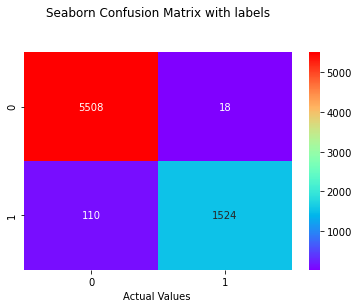

In [84]:

ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='rainbow')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_xlabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

### Classification Report

In [85]:
print(classification_report(y_test, X_test_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5526
           1       0.99      0.93      0.96      1634

    accuracy                           0.98      7160
   macro avg       0.98      0.96      0.97      7160
weighted avg       0.98      0.98      0.98      7160



## Saving the Predicted values Into a csv file

In [86]:
pdf_result = pd.DataFrame()

In [87]:
pdf_result['CustomerId'] = X_test_data['Customer Id'].values

In [88]:
pdf_result.head()

,CustomerId
0,H14663
1,H2037
2,H3802
3,H3834
4,H5053


In [89]:
pdf_result['Claim'] = pd.DataFrame(X_test_predictions)

In [90]:
pdf_result.head()

,CustomerId,Claim
0,H14663,0
1,H2037,0
2,H3802,0
3,H3834,0
4,H5053,0


In [91]:
pdf_result.rename(columns={'CustomerId':'Customer Id'}, inplace=True)

In [92]:
Insurance_Claim_Project_pdf_result = pdf_result.to_csv('Submission.csv', index=False)

In [93]:
pdf_result['Customer Id'].shape


(7160,)

In [94]:
pdf_result['Claim'].shape


(7160,)

## Saving The Model Into A File

In [95]:
joblib.dump(classifier, 'Insurance_Claim_Predictions.pkl')

['Insurance_Claim_Predictions.pkl']

In [96]:
joblib.load('Insurance_Claim_Predictions.pkl')

RandomForestClassifier(random_state=42)